In [1]:
import pandas as pd
import re
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, RNN
from tensorflow.keras import layers
from tensorflow.python.ops import rnn, rnn_cell
import tensorflow as tf

Using TensorFlow backend.


## Loading and Preparing Data



In [2]:
dfTrain = pd.read_csv("assign42019/train_data.txt")   
dfTest = pd.read_csv("assign42019/test_data.txt")   
dfLabel = pd.read_csv("assign42019/train_labels.txt")   

trainData = dfTrain.values
testData = dfTest.values
trainLabel = dfLabel.values

In [3]:
type(trainLabel[1][0])

numpy.int64

In [4]:
trainList=[]
for i in range(len(trainData)):
    ls=[]
    strToLs=trainData[i][0].split(' ')
    for s in range(len(strToLs)):
        if s<len(strToLs)-1:
            ls.append(int(strToLs[s]))
    trainList.append(ls)
    
    
    
testList=[]
for i in range(len(testData)):
    ls=[]
    strToLs=testData[i][0].split(' ')
    for s in range(len(strToLs)):
        if s<len(strToLs)-1:
            ls.append(int(strToLs[s]))
    testList.append(ls)
    
    
labels=[]
for i in range(len(trainLabel)):
    labels.append(int(trainLabel[i][0]))


### Zero-padding for inputs that have length less than 2948

In [5]:
for i in range(len(trainList)):
    trainList[i].extend([0] * (2948 - len(trainList[i])))

for i in range(len(testList)):
    testList[i].extend([0] * (2948 - len(testList[i])))
    

In [6]:
trainD=np.asarray(trainList)
testD=np.asarray(testList)
lab=np.asarray(labels)
trainD=trainD.reshape(1183,1,2948)
testD=testD.reshape(394,1,2948)

## RNN

In [7]:
model = tf.keras.Sequential()
model.add(layers.SimpleRNN(units = 32, activation = "tanh", 
              input_shape = (1, 2948), return_sequences=False))

model.add(layers.Dense(units = 1, activation = "sigmoid"))
model.compile(optimizer = "rmsprop",
  loss = "binary_crossentropy",
  metrics = ["accuracy"] )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                95392     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 95,425
Trainable params: 95,425
Non-trainable params: 0
_________________________________________________________________


In [8]:
print('Train...')
history = model.fit(x=trainD, y=lab,
          batch_size=32,
          epochs=30)
print(history.history.keys())
import matplotlib.pyplot as plt

Train...
Epoch 1/30
1183/1183 [==============================] - 0s 376us/step - loss: 0.8167 - acc: 0.5173
Epoch 2/30
1183/1183 [==============================] - 0s 132us/step - loss: 0.7671 - acc: 0.5469
Epoch 3/30
1183/1183 [==============================] - 0s 178us/step - loss: 0.7915 - acc: 0.5511
Epoch 4/30
1183/1183 [==============================] - 0s 151us/step - loss: 0.7829 - acc: 0.5655
Epoch 5/30
1183/1183 [==============================] - 0s 150us/step - loss: 0.7834 - acc: 0.5638
Epoch 6/30
1183/1183 [==============================] - 0s 182us/step - loss: 0.8053 - acc: 0.5613
Epoch 7/30
1183/1183 [==============================] - 0s 146us/step - loss: 0.8513 - acc: 0.5368
Epoch 8/30
1183/1183 [==============================] - 0s 128us/step - loss: 0.7753 - acc: 0.5554
Epoch 9/30
1183/1183 [==============================] - 0s 142us/step - loss: 0.7675 - acc: 0.5765
Epoch 10/30
1183/1183 [==============================] - 0s 144us/step - loss: 0.7362 - acc: 0.5664


In [9]:
print(history.history['acc'])
print(list(range(0,30)))

[0.5173288246936346, 0.5469146233338577, 0.5511411661730917, 0.5655114112621833, 0.5638207941365665, 0.5612848692794825, 0.5367709216886118, 0.5553677087604042, 0.5765004222511942, 0.5663567205051799, 0.5942519014403664, 0.5832628905017399, 0.5849535075265879, 0.5917159758779021, 0.6136939986116888, 0.5815722742326563, 0.5612848686496786, 0.628064243801549, 0.6162299241741532, 0.6398985630762547, 0.633136094170713, 0.6322907863888616, 0.637362636984755, 0.6145393063935403, 0.6348267120017103, 0.6356720198339461, 0.6441251059658731, 0.6196111583246181, 0.6238377010126993, 0.617075232157542]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


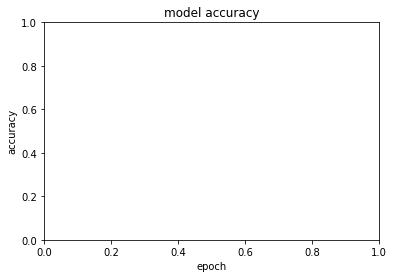

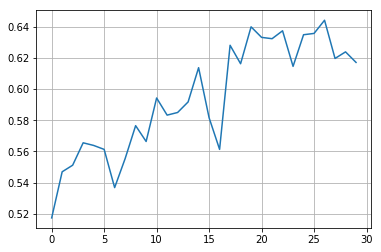

In [10]:
t = history.history['acc']
s = list(range(0,30))

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

fig, ax = plt.subplots()
ax.plot(s, t)

# ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#        title='About as simple as it gets, folks')
ax.grid()


fig.savefig("test.png")
plt.show()